In [4]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt



class ImageOperation:
    def __init__(self,image_file):
        # read image to array
        self.image = Image.open(image_file)
        # image.show()
        
        # convert image into greyscale
        self.image_grey = self.image.convert("L")
        # img.show()
        
        self.dimension = self.image_grey.size
        #print(self.dimension)
        
        
        
    def round_int(self,x):
        if x == float("inf") or x == float("-inf"):
            return 0 # or x or return whatever makes sense
        return int(round(x))
    
    
    
    def negativeImage(self, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values[i] = 255 - image_values[i]
                        
        
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        # Creates PIL image
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        img = Image.fromarray(image_values, 'L')
        img.show()
        
    
    def thresholdingImage(self, threshold, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        count = 0
        #print(image_values.shape)
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            if image_values[i] > threshold:
                image_values[i] = 255
                count += 1
            else:
                image_values[i] = 0
                
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        print(count)
        img = Image.fromarray(image_values, 'L')
        img.show()
        
        
    def logrithmicImage(self, c=1, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        if c == 1:
            c = 255 / (np.log(1 + np.max(image_values)))
            
        for i in range(len(image_values)):
            image_values[i] = c * np.log(1+image_values[i])
            
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        
        
    def inverseLogrithmicImage(self, c=1, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        if c == 1:
            c = 255 / (np.log(1 + np.max(image_values)))
        for i in range(len(image_values)):
            image_values[i] = c * self.round_int(np.exp(image_values[i]))
        
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
    
    
    
    def powerLawImage(self, gamma, c=1, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        if c == 1:
            c = 255 / (np.log(1 + np.max(image_values)))
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values[i] = c * (image_values[i] ** gamma)
        
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        
        
    def contrastStretchingImage(self, a, b, c, d, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            image_values[i] = ((image_values[i]-c) * ( (b - a)/ (d-c)))+a
        
        
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
        
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        
    
    def intensitySlicingImage(self, c, d, k, l=1, histogram=False):
        x = []
        y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
        for i in range(len(image_values)):
            if image_values[i] >= c and image_values[i] <= d:
                image_values[i] =  k 
            if l != 1:
                image_values[i] =  l
                
        if histogram == True:
            for i in range(len(image_values)):
                count = 0
                for j in range(len(image_values)):
                    if image_values[i] in x:
                        break
                    if image_values[i] == image_values[j]:
                        count += 1
                if image_values[i] not in x:
                    x.append(image_values[i])
                    y.append(count)
            self.imageHistogram(x,y)
            
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        
    def histogramEqualisation(self, histogram=False):
        x = []
        y = []
        prob_of_y = []
        image_values = np.array(self.image_grey)
        #print(image_values.shape)
        
        image_values = image_values.reshape(self.dimension[0]*self.dimension[1])
                
        
        for i in range(len(image_values)):
            count = 0
            for j in range(len(image_values)):
                if image_values[i] in x:
                    break
                if image_values[i] == image_values[j]:
                    count += 1
            if image_values[i] not in x:
                x.append(image_values[i])
                y.append(count)
        
        for i in range(len(y))
            prob_of_y.append(round(255*(y[i]/(self.dimension[0]*self.dimension[1]))))
        
        if histogram == True:
            self.imageHistogram(x,y)
            
            
        image_values = image_values.reshape(self.dimension[1], self.dimension[0])
        # Creates PIL image
        img = Image.fromarray(image_values, 'L')
        img.show()
        
    def imageHistogram(self, x, y):

#         plt.plot(x, y)

#         plt.scatter(x, y, label="stars", color="green",
#             marker="1", s=30)
        plt.bar(x, y, 
            width=0.25, color=['red', 'green'])
        plt.xlabel('Pixel Value')
        plt.ylabel('Number of Occurance')

        plt.title('Bar chart')

        plt.show()

    

In [5]:
# image_file = '/home/halcyoona/Downloads/IMG_5084.jpg'
# image_file = 'cropped-player-one.png'
image_file="/home/halcyoona/Downloads/aa.jpg"
instance = ImageOperation(image_file)

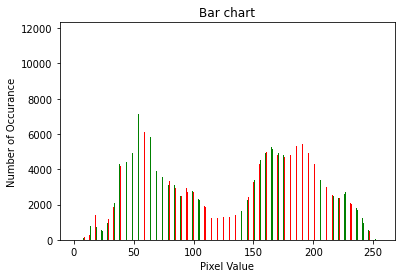

In [37]:
instance.negativeImage(histogram=True)

In [50]:
instance.thresholdingImage(100)

19362


In [234]:
instance.logrithmicImage()

In [244]:
instance.inverseLogrithmicImage()

/home/halcyoona/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in exp


In [254]:
instance.powerLawImage(0.5,1)

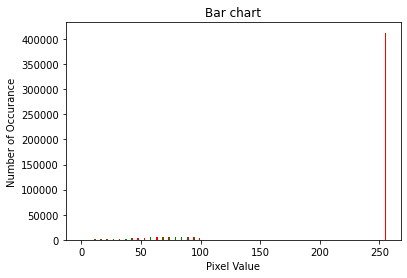

In [29]:
instance.intensitySlicingImage(100, 250, 255, histogram=True)

In [ ]:
23818

In [49]:
19362 /23818

0.812914602401545

In [13]:
a = bin(2)

In [18]:
int(a)

ValueError: invalid literal for int() with base 10: '0b10'

In [15]:
type(a)

str

In [19]:
b = a.split("b")

In [22]:
c = "000000"+b[1]

In [28]:
int(c[1])

0

In [27]:
'1000'> '1001'

False